In [2]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV



In [3]:
# read the data into a dataframe
data = pd.read_csv(r'C:\Users\Blake Chobanian\Desktop\coding stuff\housing prices king county\kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


id - Unique ID for each home sold
date - Date of the home sale
price - Price of each home sold
bedrooms - Number of bedrooms
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living - Square footage of the apartments interior living space
sqft_lot - Square footage of the land space
floors - Number of floors
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level
sqft_basement - The square footage of the interior housing space that is below ground level
yr_built - The year the house was initially built
yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in
lat - Lattitude
long - Longitude
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [56]:
# take an initial look at correlations with price. 
data.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

no surprise that sq footage has the highest correlation with price. was surprised to see that the size of the lot was not highly correlated and that condition was not well correlated. perhaps there are lots of high value properties in some areas with very small lots. 

no missing or null values

[Text(0.5, 1.0, 'Number of Bedrooms')]

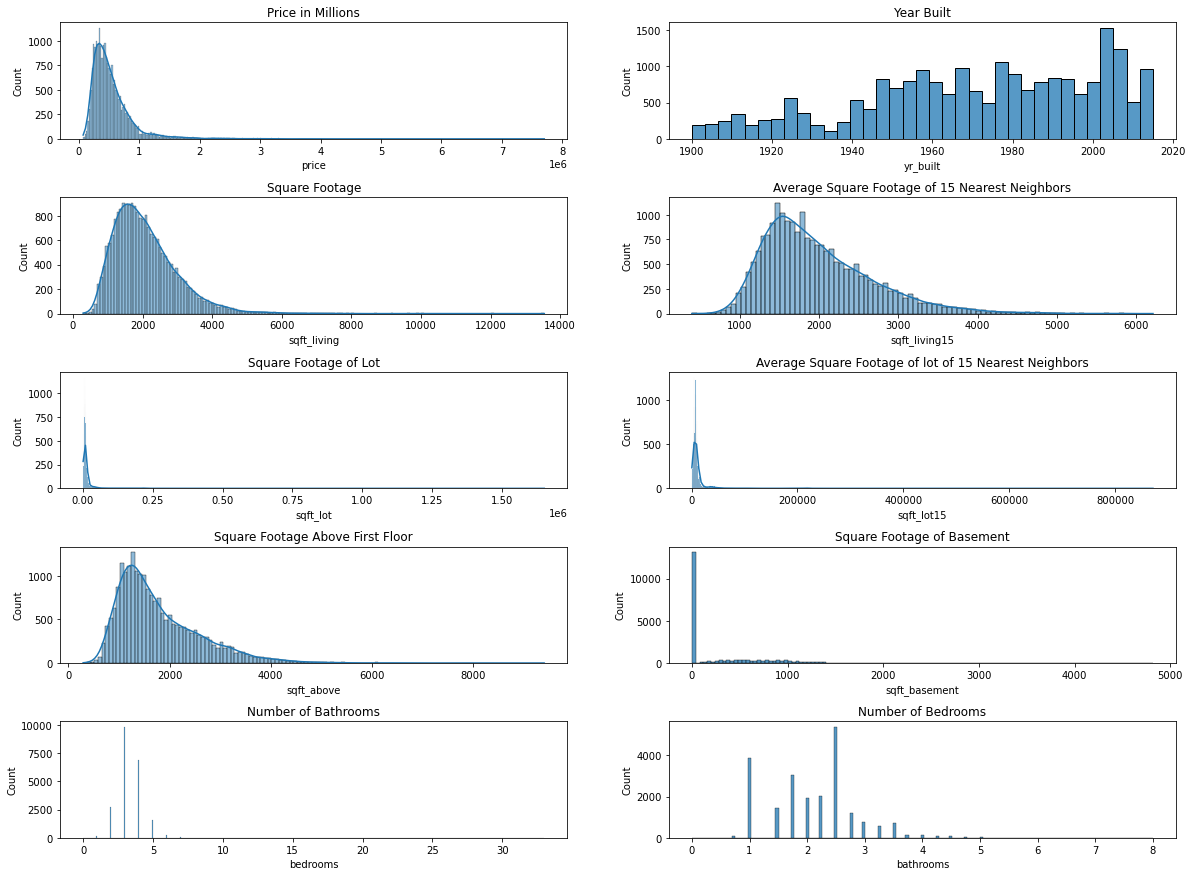

In [15]:
fig, ax = plt.subplots(5,2, figsize = (20,15))
plt.subplots_adjust(hspace = 0.5)
sns.histplot( ax = ax[0][0], x = 'price', data = data, kde = True).set(title='Price in Millions')
sns.histplot( ax = ax[0][1], x = 'yr_built', data = data,).set(title='Year Built')
sns.histplot( ax = ax[1][0], x = 'sqft_living', data = data, kde = True).set(title='Square Footage')
sns.histplot( ax = ax[1][1], x = 'sqft_living15', data = data, kde = True).set(title='Average Square Footage of 15 Nearest Neighbors')
sns.histplot( ax = ax[2][0], x = 'sqft_lot', data = data, kde = True).set(title='Square Footage of Lot')
sns.histplot( ax = ax[2][1], x = 'sqft_lot15', data = data, kde = True).set(title='Average Square Footage of lot of 15 Nearest Neighbors')
sns.histplot( ax = ax[3][0], x = 'sqft_above', data = data, kde = True).set(title='Square Footage Above First Floor')
sns.histplot( ax = ax[3][1], x = 'sqft_basement', data = data).set(title='Square Footage of Basement')
sns.histplot( ax = ax[4][0], x = 'bedrooms', data = data).set(title='Number of Bathrooms')
sns.histplot( ax = ax[4][1], x = 'bathrooms', data = data).set(title='Number of Bedrooms')

In [18]:
# can we make a new feature based on zipcode and average house values in those zipcodes
# it may be inappropriate to build a feature based on the entire dataset before reserving a test set

values = data.groupby('zipcode')['price'].mean().sort_values().to_frame()
#print(values)
counts = data.groupby('zipcode')['id'].count()
#print(counts)
zip_values_popularity = values.merge(counts, left_on = 'zipcode', right_on = 'zipcode')
print(zip_values_popularity)


                price   id
zipcode                   
98002    2.342840e+05  199
98168    2.403284e+05  269
98032    2.512962e+05  125
98001    2.808047e+05  362
98148    2.849086e+05   57
...               ...  ...
98102    9.012583e+05  105
98112    1.095499e+06  269
98040    1.194230e+06  282
98004    1.355927e+06  317
98039    2.160607e+06   50

[70 rows x 2 columns]


(70, 2)

<AxesSubplot:>

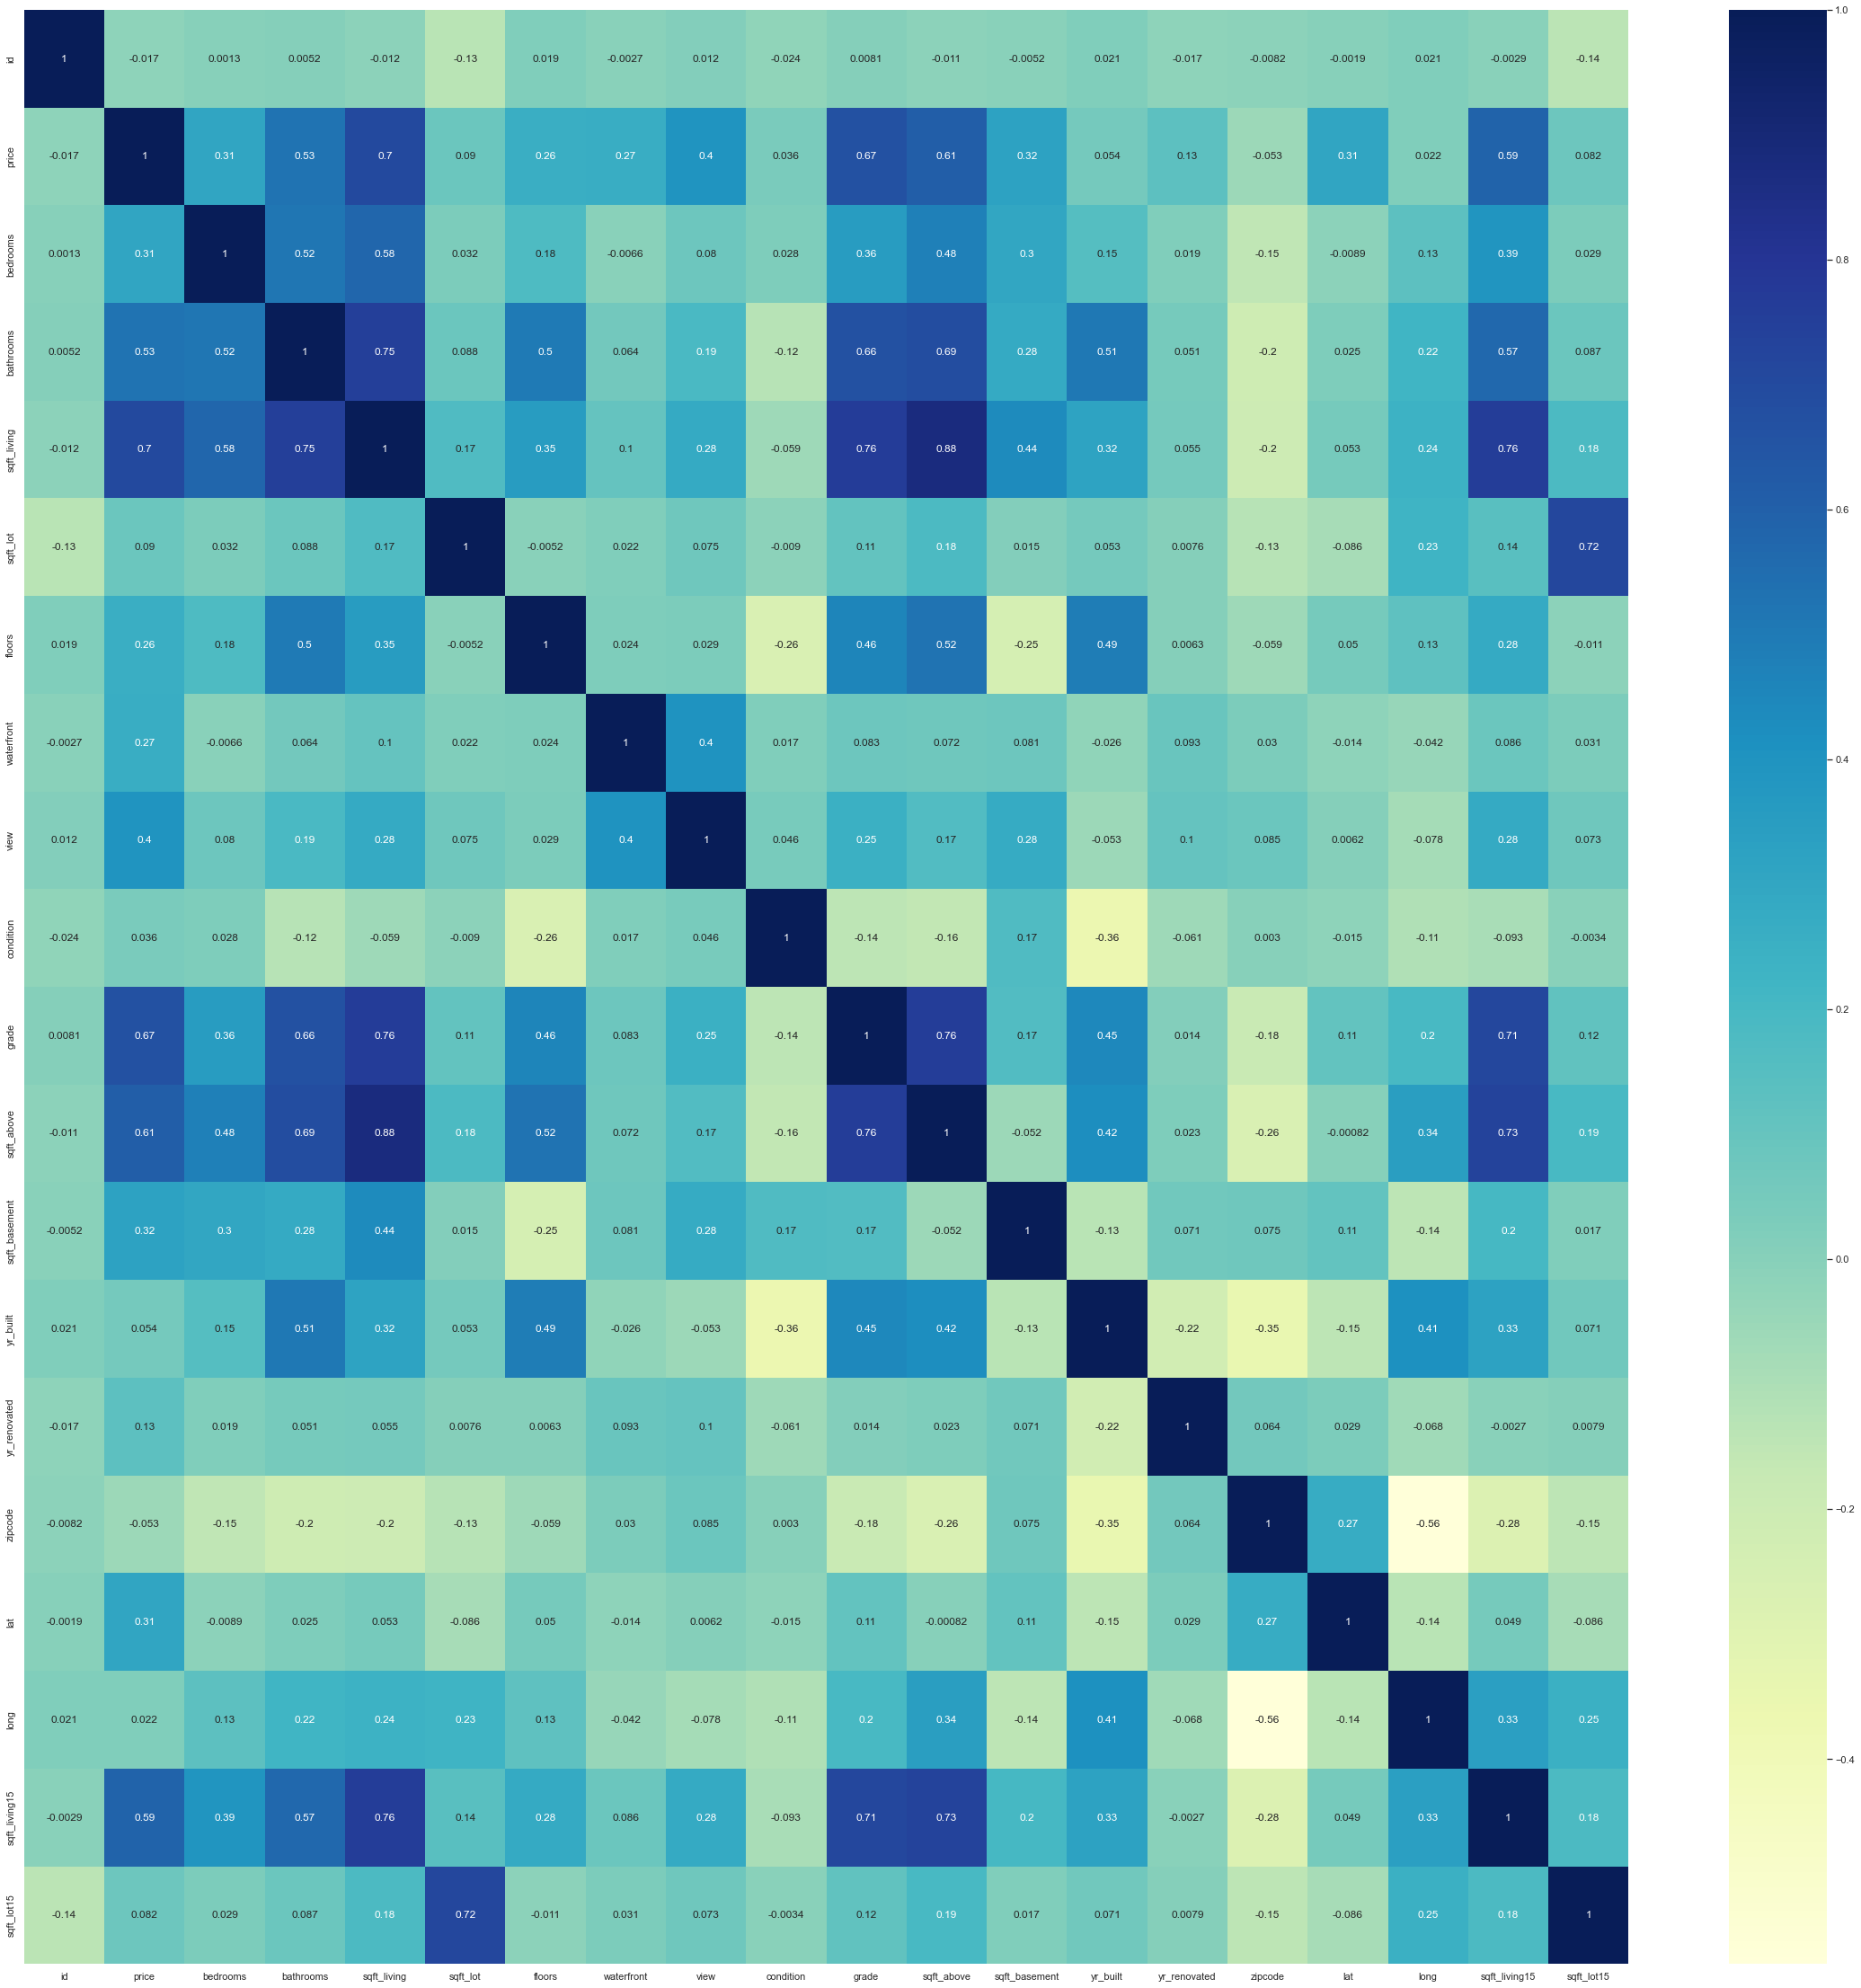

In [59]:
sns.set(rc = {'figure.figsize':(40,40)})
sns.heatmap(data.corr(), cmap= 'YlGnBu', annot=True)

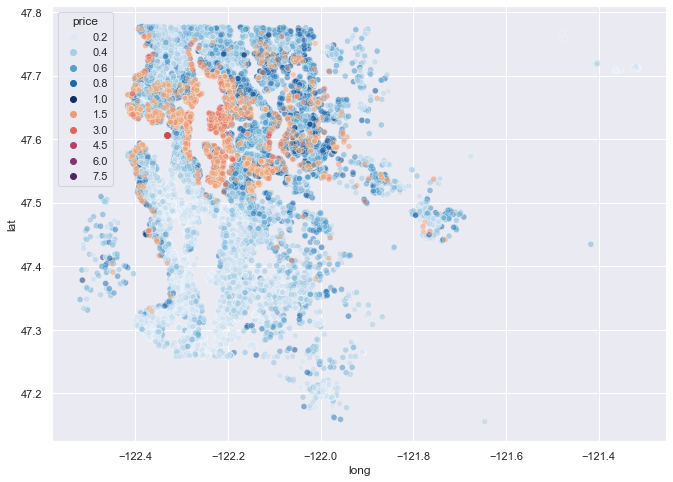

In [60]:
sns.set(rc={'figure.figsize':(11,8)})
high_value = data[data['price']>1000000]
low_value = data[data['price']<= 1000000]
sns.scatterplot(x = 'long', y = 'lat', data = low_value, alpha = 0.5, palette='Blues', hue = 'price')
sns.scatterplot(x = 'long', y = 'lat', data = high_value, alpha = 0.5, palette='flare', hue = 'price')

#position of seattle city center
plt.scatter(x=-122.3321 , y= 47.606  , color = 'r')

<AxesSubplot:xlabel='condition'>

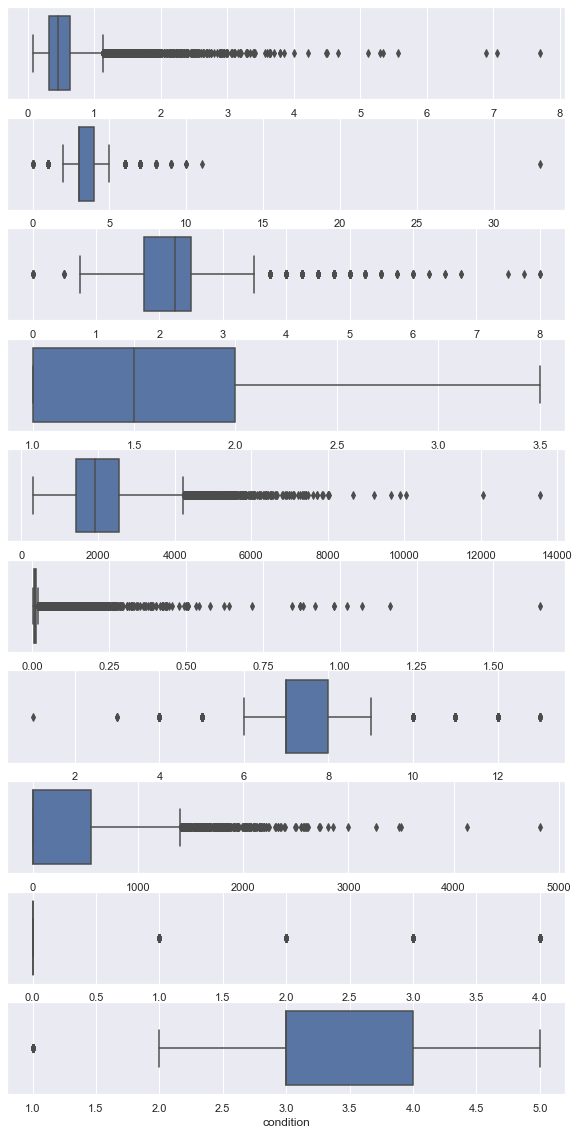

In [61]:
fig, ax = plt.subplots(10,1, figsize = (10,20))
sns.boxplot(ax = ax[0], data = data, x = 'price')
sns.boxplot(ax = ax[1], data = data, x= 'bedrooms')
sns.boxplot(ax = ax[2], data = data, x= 'bathrooms')
sns.boxplot(ax = ax[3], data = data, x= 'floors')
sns.boxplot(ax = ax[4], data = data, x= 'sqft_living')
sns.boxplot(ax = ax[5], data = data, x= 'sqft_lot')
sns.boxplot(ax = ax[6], data = data, x= 'grade')
sns.boxplot(ax = ax[7], data = data, x= 'sqft_basement')
sns.boxplot(ax = ax[8], data = data, x= 'view')
sns.boxplot(ax = ax[9], data = data, x= 'condition')

we can see that there are alot of outliers on all feature variables
- 3 most expensive homes are not representative of the rest of the dataset
- 1 home has 33 bedrooms and is only ~ 1600 sqft. this most be an error of some kind. we will remove it.
- the house with the largest living space is a significant outlier at only 2.3 million. the lot is huge and nothing else seems to indicate why it went for such a low price. we will remove this property from the set as well.  

In [62]:
print(data.sort_values('sqft_living'))
data = data[(data['price'] < 6000000)]
data = data[data['bedrooms']< 30]
data = data[data['sqft_living']< 10000]
data.shape

               id             date      price  bedrooms  bathrooms  \
19452  3980300371  20140926T000000   142000.0         0       0.00   
15381  2856101479  20140701T000000   276000.0         1       0.75   
860    1723049033  20140620T000000   245000.0         1       0.75   
18379  1222029077  20141029T000000   265000.0         0       0.75   
4868   6896300380  20141002T000000   228000.0         0       1.00   
...           ...              ...        ...       ...        ...   
8092   1924059029  20140617T000000  4668000.0         5       6.75   
9254   9208900037  20140919T000000  6885000.0         6       7.75   
3914   9808700762  20140611T000000  7062500.0         5       4.50   
7252   6762700020  20141013T000000  7700000.0         6       8.00   
12777  1225069038  20140505T000000  2280000.0         7       8.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
19452          290     20875     1.0           0     0  ...      1   
15381          370 

(21608, 21)

<AxesSubplot:xlabel='yr_built', ylabel='price'>

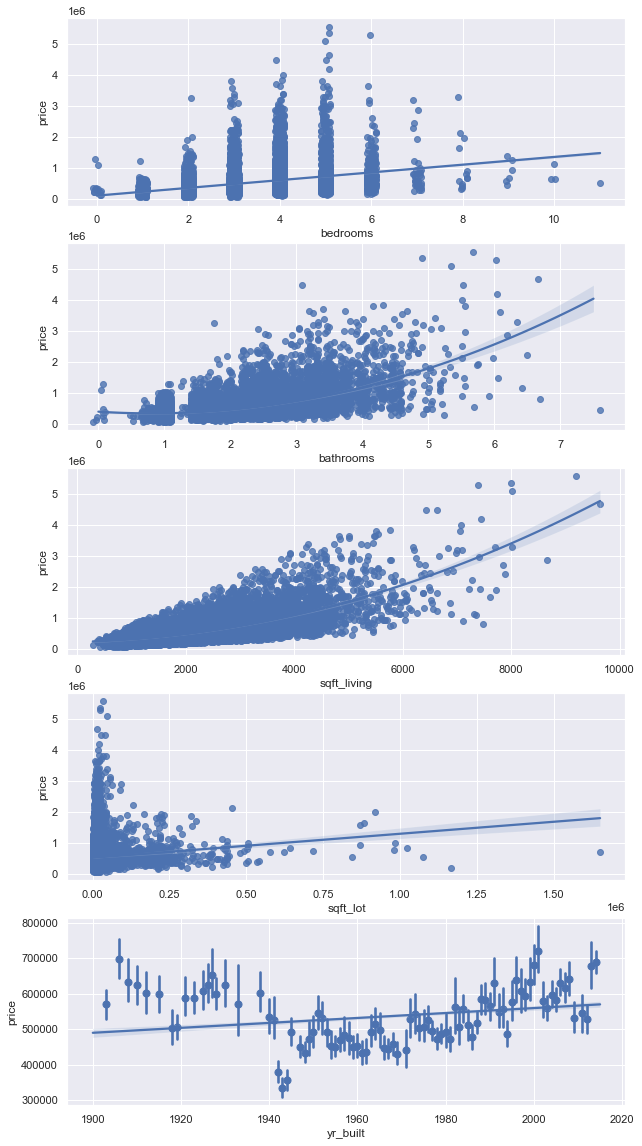

In [208]:
fig, ax = plt.subplots(5,1, figsize = (10,20))
sns.regplot(ax = ax[0], data = data, x='bedrooms' , y= 'price', x_jitter = 0.1, order = 1)
sns.regplot(ax = ax[1], data = data, x='bathrooms' , y= 'price', x_jitter = 0.1, order = 2)
sns.regplot(ax = ax[2], data = data, x='sqft_living' , y= 'price', order = 2)
sns.regplot(ax = ax[3], data = data, x='sqft_lot' , y= 'price')
sns.regplot(ax = ax[4], data = data, x='yr_built' , y= 'price', x_bins = 120)

we can see that the correlation between price ans sqft_lot is not highly correlated due to the high number of high value properties near downtown that are on very small lots. 

In [64]:
data['bedrooms'].value_counts().sort_index()

0       13
1      199
2     2760
3     9824
4     6882
5     1600
6      270
7       37
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [65]:
data['bathrooms'].value_counts().sort_index()

0.00      10
0.50       4
0.75      72
1.00    3852
1.25       9
1.50    1446
1.75    3047
2.00    1930
2.25    2047
2.50    5380
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50      99
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
Name: bathrooms, dtype: int64

In [66]:
data['floors'].value_counts().sort_index()

1.0    10679
1.5     1910
2.0     8239
2.5      160
3.0      612
3.5        8
Name: floors, dtype: int64

In [67]:
data['view'].value_counts().sort_index()

0    19488
1      332
2      962
3      509
4      317
Name: view, dtype: int64

In [68]:
data['condition'].value_counts().sort_index()

1       30
2      172
3    14028
4     5678
5     1700
Name: condition, dtype: int64

In [69]:
data['grade'].value_counts().sort_index()

1        1
3        3
4       29
5      242
6     2038
7     8980
8     6068
9     2615
10    1134
11     398
12      89
13      11
Name: grade, dtype: int64

<AxesSubplot:xlabel='yr_built', ylabel='price'>

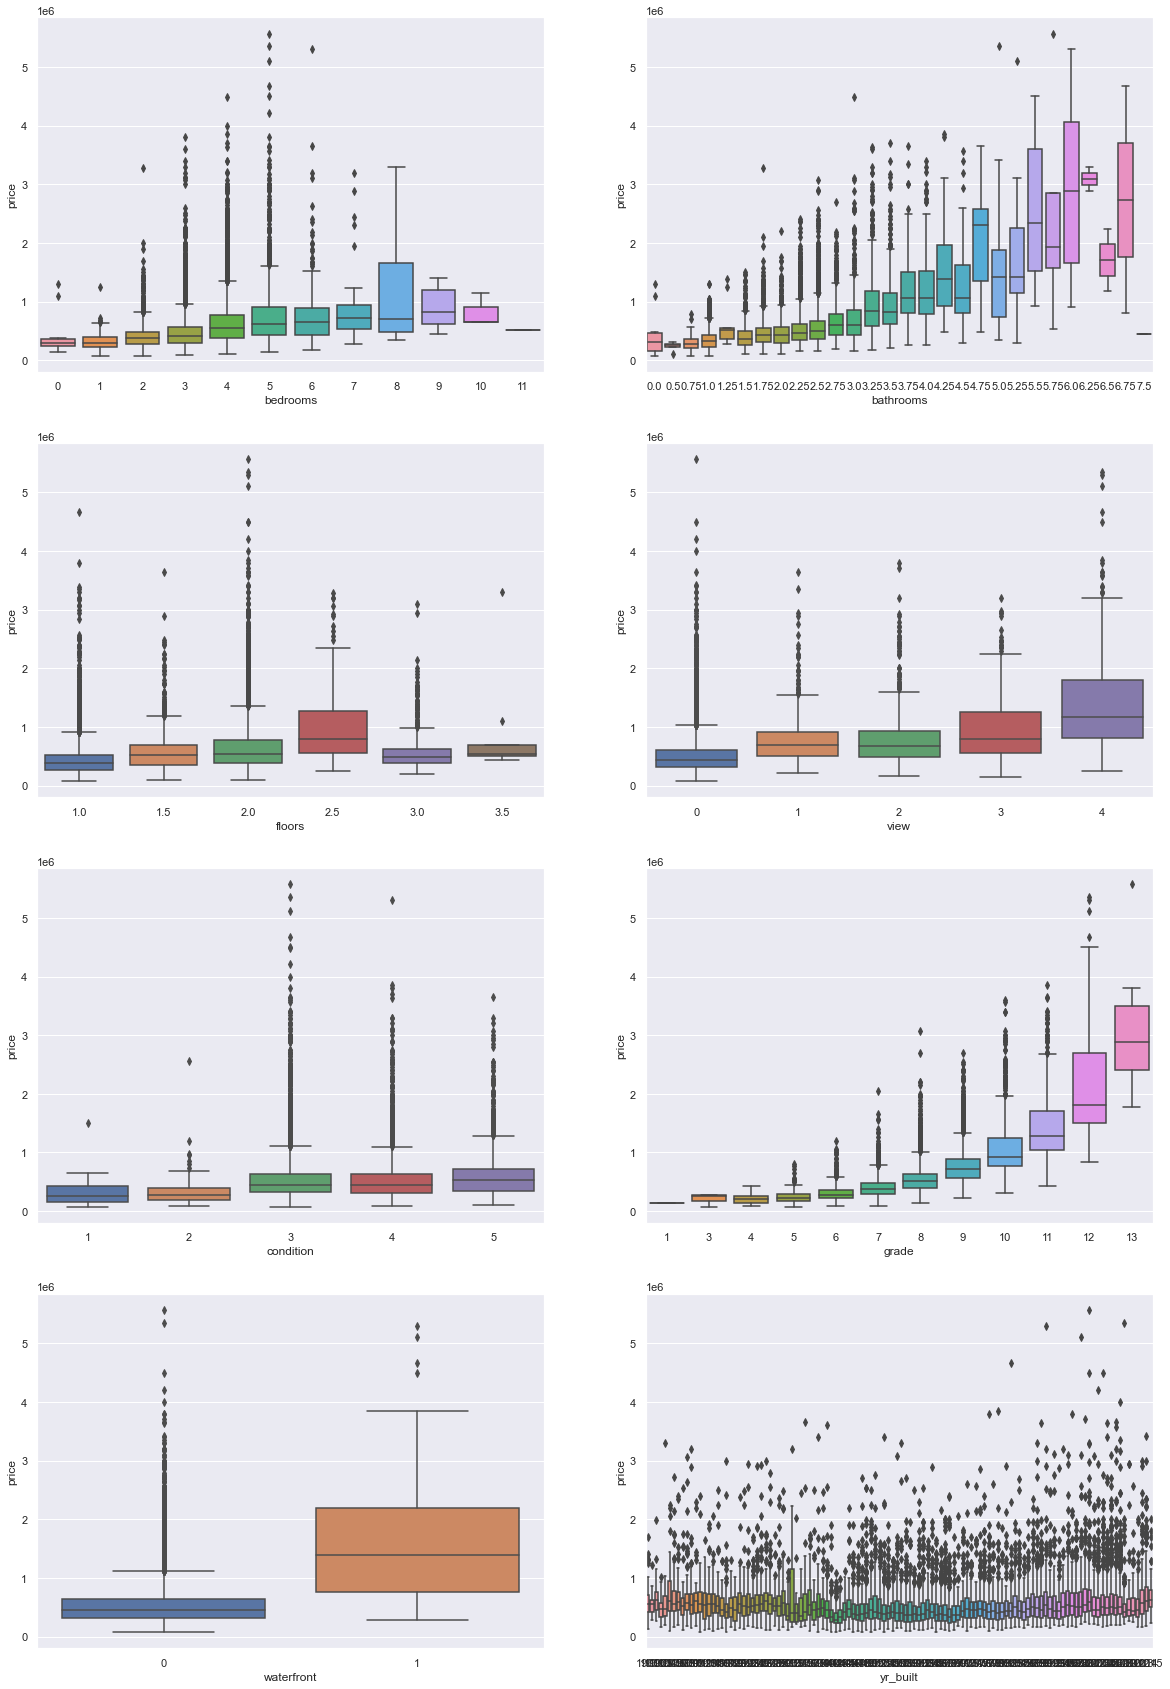

In [201]:
sns.set(rc={'figure.figsize':(20,30)})
fig , ax = plt.subplots(4,2)
sns.boxplot(ax = ax[0][0], x= 'bedrooms', y= 'price', data = data)
sns.boxplot(ax = ax[0][1], x= 'bathrooms', y= 'price', data = data)
sns.boxplot(ax = ax[1][0], x= 'floors', y= 'price', data = data)
sns.boxplot(ax = ax[1][1], x= 'view', y= 'price', data = data)
sns.boxplot(ax = ax[2][0], x= 'condition', y= 'price', data = data)
sns.boxplot(ax = ax[2][1], x= 'grade', y= 'price', data = data)
sns.boxplot(ax = ax[3][0], x= 'waterfront', y= 'price', data = data)
sns.boxplot(ax = ax[3][1], x= 'yr_built', y= 'price', data = data)

we can see what look like linear relationships between price and bedrooms and view
the relationship weith grade and bathrooms looks exponential. 
the relationship between condition and price seems to be binary? houses with a condition of at least 3 seem to have the same average value and those below 3 seem to be of roughly the same value

In [71]:
# how does condtion effect value?
print(data.groupby('condition')['price'].mean())
data.groupby('condition')['price'].std()
# I think that this feature could be remapped to have 3 values 1,2 --> 1: 3,4--> 2: 5 --> 3

condition
1    334431.666667
2    327287.145349
3    540971.698318
4    519936.071680
5    612401.864706
Name: price, dtype: float64


condition
1    271172.804837
2    245418.413220
3    355999.643932
4    345654.514854
5    411092.305057
Name: price, dtype: float64

In [72]:
# remap condition so that 1,2 -> 1, 3,4 -> 2, and 5-> 3 
data['condition_tri'] =((data['condition']+1)/2).apply(np.floor)
data['condition_tri'].value_counts()

2.0    19706
3.0     1700
1.0      202
Name: condition_tri, dtype: int64

Train test split

In [73]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'condition_tri'],
      dtype='object')

In [74]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade',\
    'sqft_above','sqft_basement','yr_built','lat','long','sqft_living15','sqft_lot15']
target = ['price']
X_train, X_test, y_train, y_test = train_test_split(data[features],data[target], test_size = 0.3, random_state = 42)

Linear Regression

In [75]:
linreg = LinearRegression(normalize = True)
linreg.fit(X_train,y_train)
lin_pred = linreg.predict(X_test)
linreg_score = metrics.r2_score(lin_pred,y_test)
print('R^2: {}'.format(linreg_score))
print('Mean Absolute Error: ', metrics.mean_absolute_error(lin_pred,y_test))
print('Root Mean Squared Error: ', metrics.mean_squared_error(lin_pred,y_test, squared = False))
coefficients_linreg = pd.DataFrame(X_test.columns, linreg.coef_.reshape(16,))
print(coefficients_linreg)

R^2: 0.5347250850894987
Mean Absolute Error:  124875.35607304849
Root Mean Squared Error:  41708476496.404686
                            0
-33266.008448        bedrooms
 45917.219817       bathrooms
 80.537770        sqft_living
 0.169896            sqft_lot
 4970.562398           floors
 560248.980551     waterfront
 50454.346461            view
 29402.830675       condition
 99649.607449           grade
 81.847271         sqft_above
 56.799262      sqft_basement
-2568.385030         yr_built
 553405.701492            lat
-96741.000573            long
 33.258837      sqft_living15
-0.358934          sqft_lot15


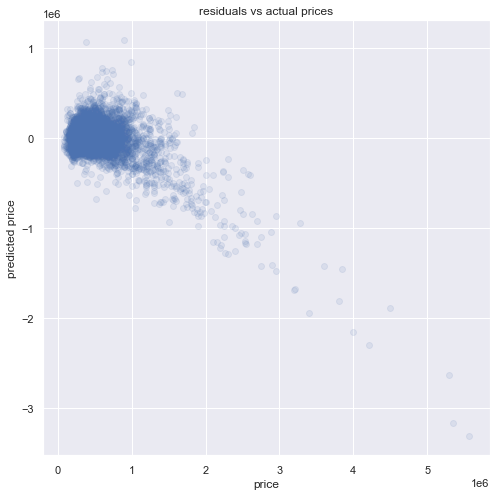

In [182]:
# visualizing predicted value vs actual value
plt.figure(figsize = (8,8))
plt.scatter(y_test,lin_pred-y_test, alpha = .1)
plt.xlabel('price')
plt.ylabel('predicted price')
plt.title('residuals vs actual prices')
plt.show()

Random Forest

In [77]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
forest_pred = forest.predict(X_test)

C:\Users\BLAKEC~1\AppData\Local\Temp/ipykernel_13900/1819261786.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


In [78]:
forest_score =metrics.r2_score(forest_pred,y_test)
print('R^2: {}'.format(forest_score))
print('Mean Absolute Error: ', metrics.mean_absolute_error(forest_pred,y_test))
print('Root Mean Squared Error: ', metrics.mean_squared_error(forest_pred,y_test, squared = False))

R^2: 0.742393779291201
Mean Absolute Error:  95934.83341045812
Root Mean Squared Error:  32097860265.77248


In [79]:
# search for best params

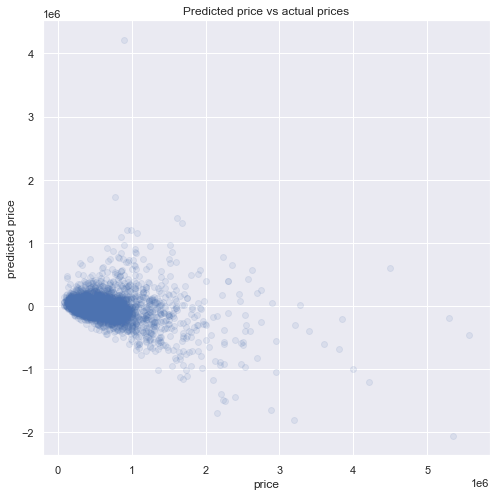

In [181]:
# visualizing predicted value vs actual value
plt.figure(figsize = (8,8))
risiduals_forest = pd.DataFrame(forest_pred)-np.array(y_test)
plt.scatter(y_test,risiduals_forest, alpha=.1)
plt.xlabel('price')
plt.ylabel('predicted price')
plt.title('Predicted price vs actual prices')
plt.show()

XGBoost

In [163]:
data_dmatrix = xgb.DMatrix(data=data[features],label=data[target])
xg = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.6, learning_rate = 0.08, max_depth = 7, alpha = 5, n_estimators= 1000, min_child_weight = 20)
xg.fit(X_train, y_train)
xg_preds = xg.predict(X_test)
xg_score = metrics.r2_score(xg_preds, y_test)
print('R^2: {}'.format(xg_score))
print('Mean Absolute Error: ', metrics.mean_absolute_error(xg_preds,y_test))
print('Root Mean Squared Error: ', metrics.mean_squared_error(xg_preds,y_test, squared = False))

R^2: 0.8777055126720047
Mean Absolute Error:  66941.61082349993
Root Mean Squared Error:  121138.54473545728


In [117]:
# # hyperperameter tuning
# parameters = {'n_estimators': [200], 
#               'learning_rate': [.075,.08,.085],
#               'max_depth': [7],
#               'colsample_bytree': [.5,.6,.7],
#               'alpha': [1,2,3],
#               'min_child_weight': [16,20,24]}
# xg_gscv = GridSearchCV(estimator = xg, param_grid = parameters, cv = 3, n_jobs = -1).fit(X_train, y_train)
# print("Best score: %0.3f" % xg_gscv.best_score_)
# print("Best parameters set:", xg_gscv.best_params_)

In [118]:
print("Best score: %0.3f" % xg_gscv.best_score_)
print("Best parameters set:", xg_gscv.best_params_)

Best score: 0.899
Best parameters set: {'alpha': 1, 'colsample_bytree': 0.6, 'learning_rate': 0.08, 'max_depth': 7, 'min_child_weight': 20, 'n_estimators': 200}


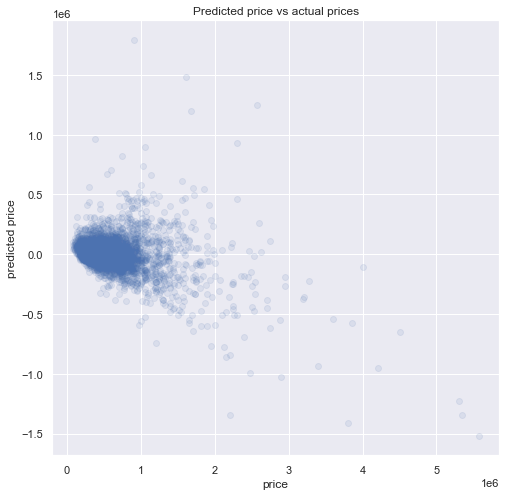

In [178]:
# visualizing predicted value vs actual value
plt.figure(figsize = (8,8))
risiduals_xg = pd.DataFrame(xg_preds)-np.array(y_test)
plt.scatter(y_test,risiduals_xg, alpha = .1)
plt.xlabel('price')
plt.ylabel('predicted price')
plt.title('Predicted price vs actual prices')
plt.show()

<Figure size 576x576 with 0 Axes>

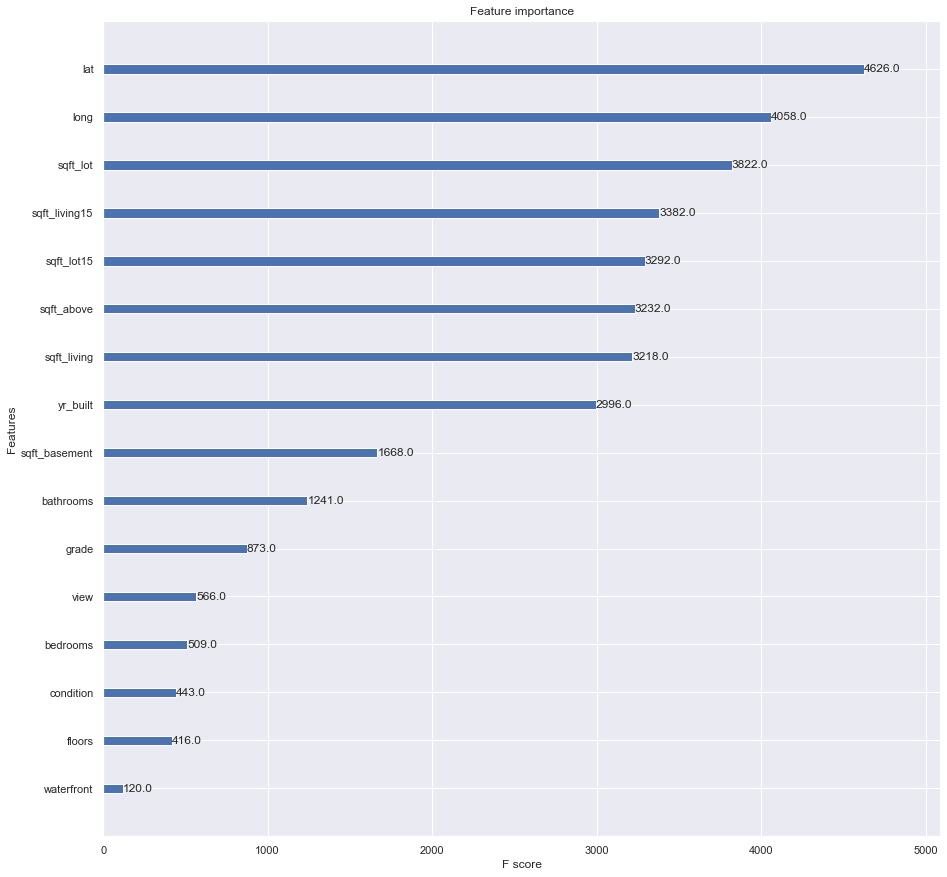

In [200]:
plt.figure(figsize=(8,8))
xgb.plot_importance(xg)
plt.rcParams["figure.figsize"] = (100,100)
plt.show()

-Unsurprisingly we find that location (lat and long) had the greatest impact on property values. As they say... location, location, location
-also unserprisingly, the other largest impactors were size of house, size of lot, house size and lot size of neighbors, how much of living space is above the ground
-features with the lowest importance were waterfront (which may not have been a very accurately attributed label), number of floors, contition, bedrooms, and view.
-I think its interesting to note that the number of bedrooms was about twice as important as number of bedrooms.
-the bigest surprise was that year built was a very important feature even though the trend does not look continuous, there is a clear upward trend from about 1942-2001 